Goal: Investigate which features are most important and vulnerable to change using random forest with finalised preprocessing code.

In [2]:
import pandas as pd
import numpy as np
import os
import numbers
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Loading the random forest model with auc of 0.93

In [3]:
model_file = os.path.join("fitted_models", "rf_0.93")
pickle_file = open(model_file, "rb")
model = pickle.load(pickle_file)

In [4]:
test_data_file = "X_test_data"
X_test = pickle.load(open(test_data_file, "rb"))

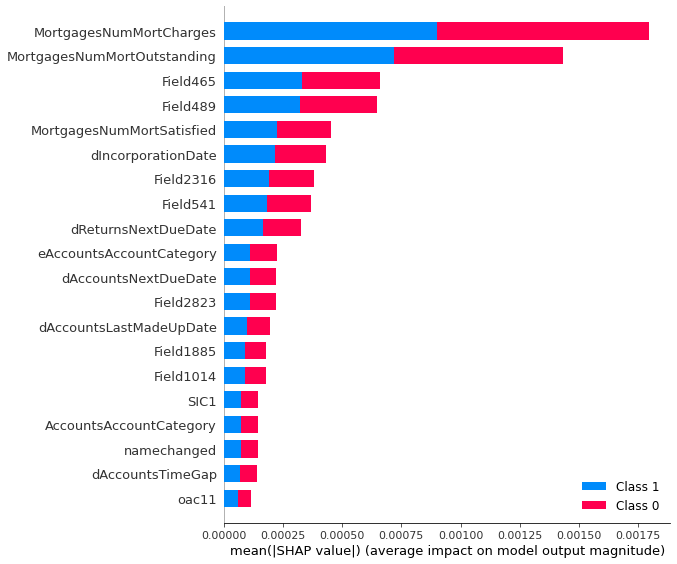

In [5]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")